___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

**зробіть описову статистику даного файлу**

In [1]:
import pandas as pd
import numpy as np
from apyori import apriori

df = pd.read_csv('groceries.csv')
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [2]:
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop('Item(s)', axis=1)

In [4]:
df

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(9835, 32)

In [6]:
records = []
for i in range(0, 9835):
    records.append([str(df.values[i,j]) for j in range(0, 32)  ])

In [7]:
records

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan'

In [8]:
association_rules = apriori(records, min_support=0.003, min_confidence=0.2, min_lift=3, max_length=2)

for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + " and ".join(items))

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: hamburger meat and Instant food products
Support: 0.003050330452465684
Confidence: 0.379746835443038
Lift: 11.42143769597027
Rule: whipped/sour cream and baking powder
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: beef and root vegetables
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: berries and whipped/sour cream
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: bottled beer and liquor
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: red/blush wine and bottled beer
Support: 0.004880528723945094
Confidence: 0.253968253968254
Lift: 3.1537598204264876
Rule: flour and margarine
Support: 0.0037620742247076767
Confidence: 0.21637426900584797
Lift: 3.6945155133203382
Rule: flour and sugar
Support: 0.00498220640569395
Confidence: 0.28654970760233917
Lift: 8.46311223504206
Rule: flour and whipped/sour cream
Support

**ведіть топ-3 продукти, що продаються**

*перший спосіб*

In [9]:
records_cleaned = [[item for item in record if str(item) != 'nan'] for record in records]

association_rules = apriori(records_cleaned, min_support=0.03, min_confidence=0.0002, min_lift=1, max_length=1)
top_product_triples = sorted(association_rules, key=lambda x: x[1], reverse=True)[:3]

print("Топ-3 продукти, що продаються:")
for item in top_product_triples:
    pair = item[0] 
    items = [x for x in pair]
    print(f"- {', '.join(items)} ({item[1]} - support)")


Топ-3 продукти, що продаються:
- whole milk (0.25551601423487547 - support)
- other vegetables (0.1934926283680732 - support)
- rolls/buns (0.18393492628368074 - support)


*другий спосіб*

In [10]:
product_counts = {}
for index, row in df.iterrows():
    items = [item.strip() for item in row.tolist() if isinstance(item, str)]
    for item in items:
        if item in product_counts:
            product_counts[item] += 1
        else:
            product_counts[item] = 1

top_products = sorted(product_counts.items(), key=lambda x: x[1], reverse=True)[:3]

print("топ-3 продукти, що продаються:")
for product, count in top_products:
    print(f"- {product} ({count} - times)")

топ-3 продукти, що продаються:
- whole milk (2513 - times)
- other vegetables (1903 - times)
- rolls/buns (1809 - times)


**виведіть топ-2 пари продуктів, що продаються**

In [11]:
association_rules = apriori(records, min_support=0.003, min_confidence=0.2, min_lift=3, max_length=2)

top_product_pairs = sorted(association_rules, key=lambda x: x[1], reverse=True)[:2]

print("Топ-2 пари продуктів, що продаються:")
for item in top_product_pairs:
    pair = item[0] 
    items = [x for x in pair]
    print(f"- {items[0]} and {items[1]} ({item[1]} - support)")

Топ-2 пари продуктів, що продаються:
- beef and root vegetables (0.017386883579054397 - support)
- berries and whipped/sour cream (0.009049313675648195 - support)


**придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)**

Аналіз асоціативних зв'язків може допомогти зрозуміти, які товари часто купують разом, що може бути корисно для рекомендацій клієнтам та розміщенні товарів в магазині. Для прикладу, коли замовлення здіснюється онлайн, при додавані товару в корзину чи перегляді певного тоовару, можна додати оголошення-підказку, що часто купують із цим товаром. Коли замовлення відбуваються оффлайн, пари товарів, які часто зустрічаються краще розміщувати недалеко один від одного для зручності клієнта.
За допомогою аналізу можна визначити найбільш популярні товари та їхні комбінації, що може вказувати на попит на ці товари та може допомогти в плануванні запасів. 
Отже,  аналіз асоціативних правил є корисним інструментом для аналізу попиту на товари та плануванні запасів, а також для покращення організації роботи магазину.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [12]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [14]:
def Gender(value):
    if value['Gender'] in ['Female']:
        return 1
    elif value['Gender'] in ['Male']:
        return 0

# створення нового стовпчика "престижність районів"
data['Gender_value'] = data.apply(Gender, axis=1)

In [15]:
data = data.drop(['CustomerID', 'Gender'], axis=1)

In [16]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_value
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


**Агломеративний алгоритм**

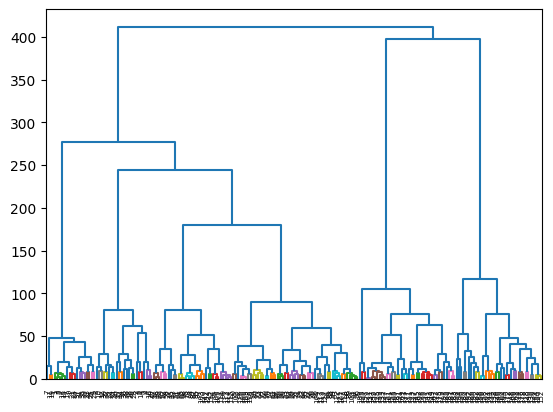

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(data,  method='ward')

dendrogram(mergings, leaf_rotation=90, color_threshold=10)
plt.show()
     

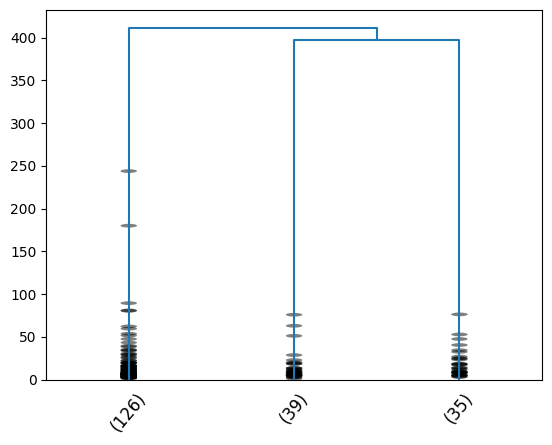

In [18]:
dendrogram(mergings,
           truncate_mode='lastp',   
           p=3,  
           leaf_rotation=50,
           show_contracted=True)

plt.show()

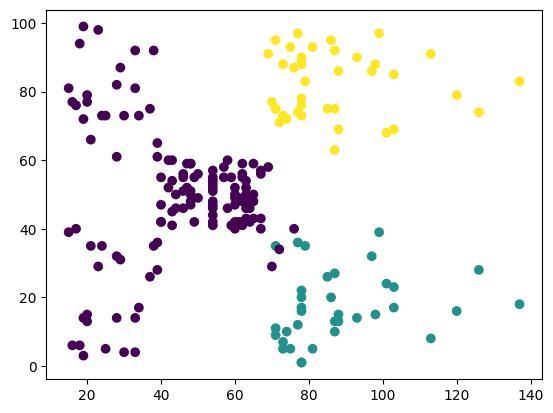

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_value']].values

hc = AgglomerativeClustering(n_clusters=3)

x_axis = X[:,1]
y_axis = X[:,2]

y_hc = hc.fit_predict(data)



metrics.silhouette_score(data, y_hc)
     

plt.scatter(x_axis, y_axis, c=y_hc)
plt.show()

In [20]:
data['cluster'] = y_hc

means = data.groupby('cluster').mean()
counts = data['cluster'].value_counts()

print(means)
print(counts)

               Age  Annual Income (k$)  Spending Score (1-100)  Gender_value
cluster                                                                     
0        39.968254           44.833333               49.460317      0.603175
1        41.685714           88.228571               17.285714      0.428571
2        32.692308           86.538462               82.128205      0.538462
cluster
0    126
2     39
1     35
Name: count, dtype: int64


**Висновок для агломеративного алгоритму**

Найвищий показник має кластер 0, якому середні значення:
- Age - 39.968254, 
- Annual Income (k$) - 44.833333, 
- pending Score (1-100) - 49.460317, 
Показник статі практично не впливає

**KMeans**

C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

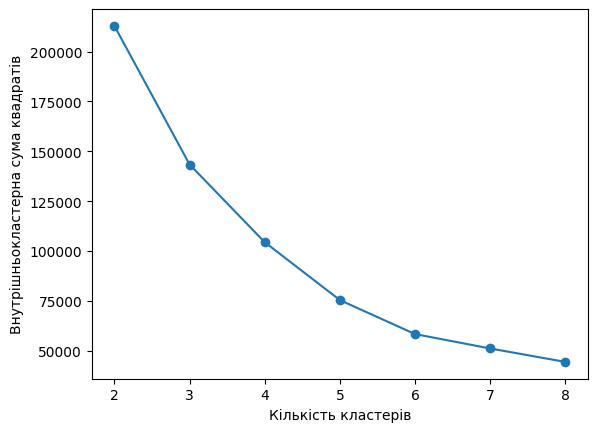

In [21]:
from sklearn.cluster import KMeans

# список кількостей кластерів, які будуть перевірятися
n_clusters_list = [2, 3, 4, 5, 6, 7, 8]

# список для збереження внутрішньокластерної суми квадратів
inertia_list = []

# проведення кластеризації та обчислення внутрішньокластерної суми квадратів
for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# побудова графіку
plt.plot(n_clusters_list, inertia_list, '-o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Внутрішньокластерна сума квадратів')
plt.show()

C:\Users\shvor\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


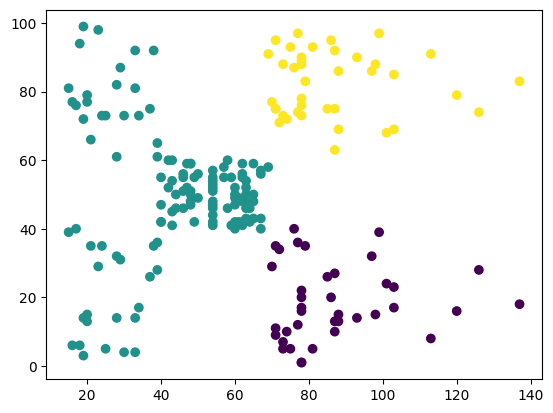

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=3)

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_value']].values
model.fit(X)

all_predictions = model.predict(X)

x_axis = X[:,1]
y_axis = X[:,2]

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()


In [23]:
data['cluster KMeans'] = all_predictions

means_KMeans = data.groupby('cluster KMeans').mean()
counts_KMeans = data['cluster KMeans'].value_counts()

print(means_KMeans)
print(counts_KMeans)

                      Age  Annual Income (k$)  Spending Score (1-100)   
cluster KMeans                                                          
0               40.394737           87.000000               18.631579  \
1               40.325203           44.154472               49.829268   
2               32.692308           86.538462               82.128205   

                Gender_value   cluster  
cluster KMeans                          
0                   0.473684  0.921053  
1                   0.593496  0.000000  
2                   0.538462  2.000000  
cluster KMeans
1    123
2     39
0     38
Name: count, dtype: int64


**Висновок для KMeans**

Найвищий показник має кластер 0, якому середні значення:
- Age -  40.325203, 
- Annual Income (k$) - 44.154472, 
- pending Score (1-100) - 49.829268, 

Відповідно до датасету "Mall_Customers" цільовою групою будуть люди віком 40 років, середнім доходом 44 k$, рівнем витрат 50. Для цієї групи буде доцільно впроваджувати маркетингові акції